<a href="https://colab.research.google.com/github/Syahdant/Tugas-Python-11-CNN/blob/main/Syahdan_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Google Colab

/content/drive/MyDrive/Google Colab


In [3]:
ls

Motor/


In [4]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [5]:
print("[INFO] loading images...")
imagePaths = paths.list_images("Motor")
data = []
labels = []

[INFO] loading images...


In [6]:
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((224, 224))) / 255.0
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [7]:
print(labels)

['adventure', 'adventure', 'adventure', 'adventure', 'adventure', 'naked', 'naked', 'naked', 'naked', 'naked', 'sport', 'sport', 'sport', 'sport', 'sport']


In [8]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [9]:
print(labels)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [10]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25,shuffle=True)
print(trainX.shape)
print(testX.shape)

(11, 224, 224, 3)
(4, 224, 224, 3)


In [11]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(15, 3,3, activation='relu', input_shape=(224,224,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(30, 3,3, activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(25, 3,3, activation='relu'))
model1.add(MaxPooling2D(2,2))

model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(3, activation='softmax'))

model1.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 74, 74, 15)        420       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 15)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 30)        4080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 30)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 25)          6775      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 25)          0         
_________________________________________________________________
flatten (Flatten)            (None, 25)                0

In [12]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=5)

[INFO] training network...
Epoch 1/25
3/3 [==============================] - 0s 68ms/step - loss: 1.0888 - accuracy: 0.4545 - val_loss: 1.0945 - val_accuracy: 0.2500
Epoch 2/25
3/3 [==============================] - 0s 15ms/step - loss: 1.0651 - accuracy: 0.3636 - val_loss: 1.1224 - val_accuracy: 0.2500
Epoch 3/25
3/3 [==============================] - 0s 16ms/step - loss: 1.0543 - accuracy: 0.3636 - val_loss: 1.1410 - val_accuracy: 0.2500
Epoch 4/25
3/3 [==============================] - 0s 19ms/step - loss: 1.0412 - accuracy: 0.3636 - val_loss: 1.1503 - val_accuracy: 0.2500
Epoch 5/25
3/3 [==============================] - 0s 15ms/step - loss: 1.0281 - accuracy: 0.3636 - val_loss: 1.1651 - val_accuracy: 0.2500
Epoch 6/25
3/3 [==============================] - 0s 15ms/step - loss: 1.0111 - accuracy: 0.4545 - val_loss: 1.1764 - val_accuracy: 0.2500
Epoch 7/25
3/3 [==============================] - 0s 15ms/step - loss: 0.9938 - accuracy: 0.4545 - val_loss: 1.1886 - val_accuracy: 0.2500


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


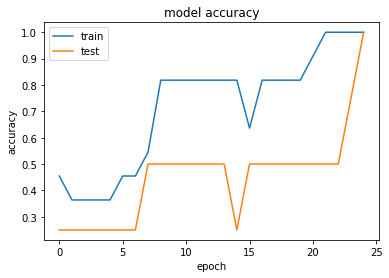

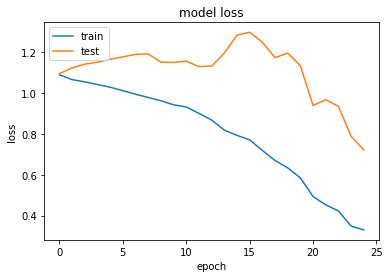

In [13]:
import matplotlib.pyplot as plt
print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=5)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

   adventure       1.00      1.00      1.00         1
       naked       1.00      1.00      1.00         1
       sport       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

